In [3]:
!pip install pandas scikit-learn seaborn matplotlib

In [18]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
directory = "corpus"
metadata = "data_full.csv"
df = pd.read_csv(metadata)

In [6]:
len(df)

100

In [7]:
df

,num,msttr,ari,fg,fe,words,comm
0,102,0.705500,6.2,3.7,86.50,1494,10
1,107,0.701875,6.2,4.8,83.76,3469,8
2,106,0.710899,9.2,7.3,77.16,7559,21
3,107,0.710899,9.2,7.3,77.16,7559,21
4,124,0.701765,9.8,6.7,78.89,1465,0
...,...,...,...,...,...,...,...
95,120,0.726429,9.7,8.7,73.61,1201,42
96,120,0.726429,9.7,8.7,73.61,2875,42
97,120,0.726429,9.7,8.7,73.61,1201,0
98,120,0.726429,9.7,8.7,73.61,2875,0


In [8]:
df = pd.read_csv("data_full.csv")

## Use matplotlib to plot scatterplots of the data

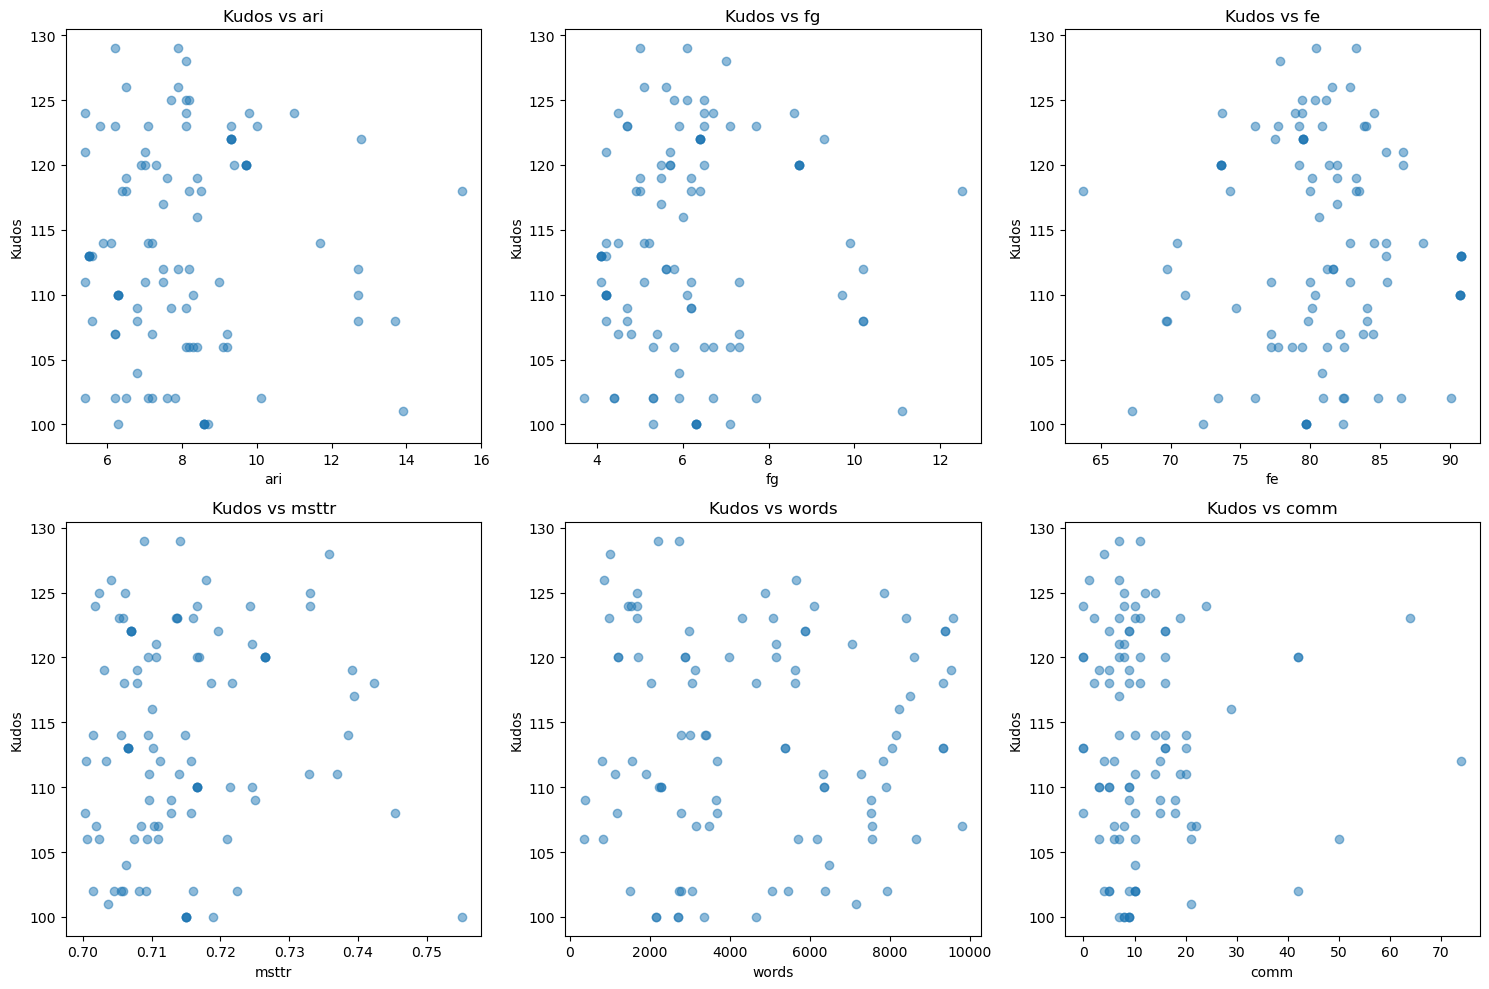

In [10]:
df = pd.read_csv("data_full.csv")

dependent_variable = "num"
independent_variable = ["ari", "fg", "fe", "msttr", "words", "comm"]

plt.figure(figsize=(15, 10))

for i, iv in enumerate(independent_variable, 1):
    plt.subplot(2, 3, i) 
    plt.scatter(df[iv], df[dependent_variable], alpha=0.5)
    plt.xlabel(iv)
    plt.ylabel("Kudos")
    plt.title(f"Kudos vs {iv}")

plt.tight_layout()
plt.show()

## Perform Simple Linear Regression on the data in the columns

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

data = pd.read_csv("data_full.csv") 
dependent_variable = "num"
independent_variables = ["ari", "fg", "fe", "msttr", "words", "comm"]

for var in independent_variables:
    X = data[[var]]
    y = data[dependent_variable]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train.shape, X_test.shape, y_train.shape, y_test.shape

    model = LinearRegression()
    model.fit(X_train,y_train)
    model.intercept_
    model.coef_
    y_pred = model.predict(X_test)
    y_pred
    mean_absolute_error(y_test,y_pred)
    mean_absolute_percentage_error(y_test,y_pred)
    mean_squared_error(y_test,y_pred)
    
    print(model.intercept_)
    print(model.coef_)

112.17013169840013
[0.21848158]
111.26884251916469
[0.43029672]
121.30669720792146
[-0.0913706]
75.42481625797936
[53.84825106]
114.28625357735878
[-7.1377786e-05]
114.58033064378344
[-0.04908287]


## For each dependent variable, plot a function based on the intercept and slope of the linear function

Intercept (β₀): 112.17
Slope (β₁): 0.22


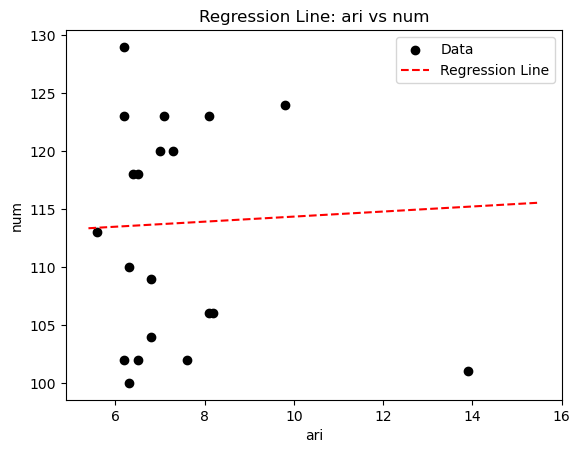

Intercept (β₀): 111.27
Slope (β₁): 0.43


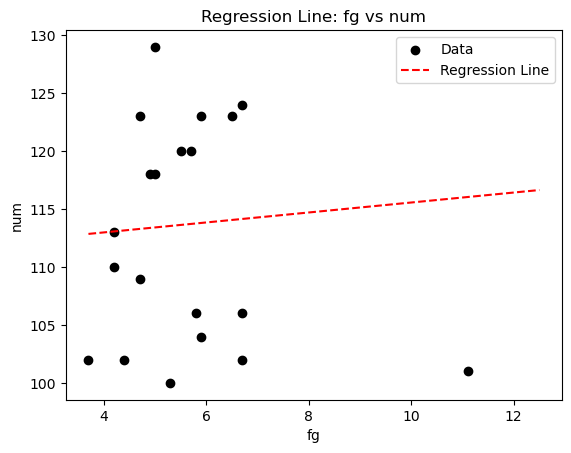

Intercept (β₀): 121.31
Slope (β₁): -0.09


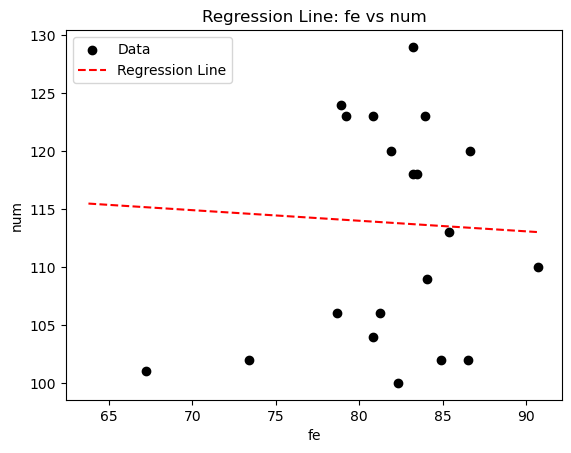

Intercept (β₀): 75.42
Slope (β₁): 53.85


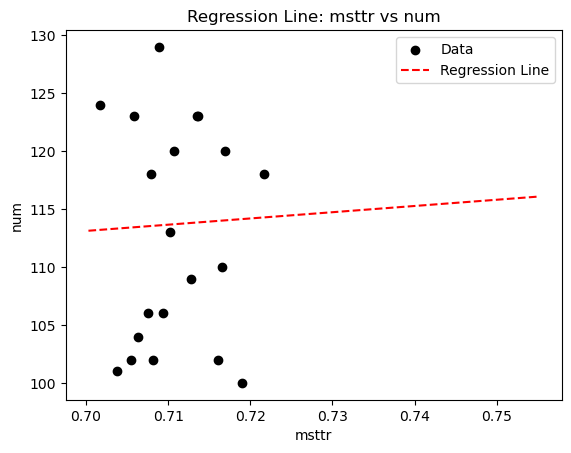

Intercept (β₀): 114.29
Slope (β₁): -0.00


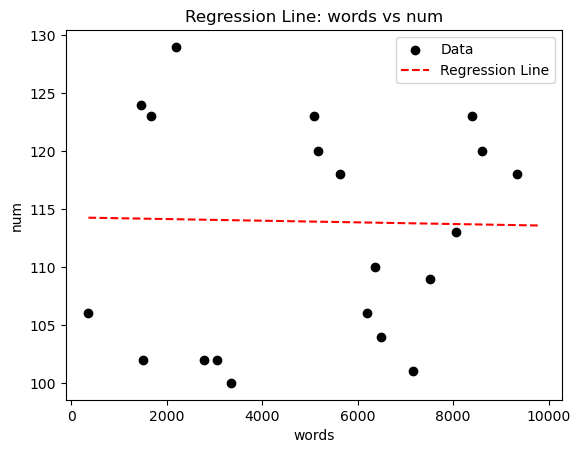

Intercept (β₀): 114.58
Slope (β₁): -0.05


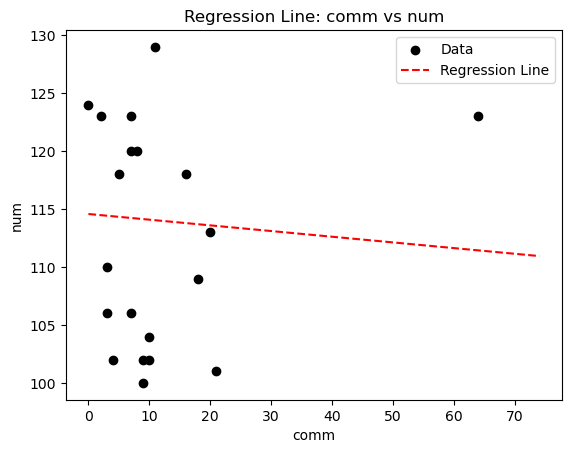

In [20]:
data = pd.read_csv("data_full.csv")  

dependent_variable = "num"
independent_variables = ["ari", "fg", "fe", "msttr", "words", "comm"]

for var in independent_variables:

    X = data[[var]]
    y = data[dependent_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    intercept = model.intercept_
    slope = model.coef_[0]

    print(f"Intercept (β₀): {intercept:.2f}")
    print(f"Slope (β₁): {slope:.2f}")

    X_range = np.linspace(X.min(), X.max(), 100)  
    y_line = intercept + slope * X_range 

    plt.scatter(X_test, y_test, color="black", label="Data")
    plt.plot(X_range, y_line, color="red", linestyle="dashed", label="Regression Line")
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.title(f"Regression Line: {var} vs {dependent_variable}")
    plt.legend()
    plt.show()

## Calculate the r2 score 

In [16]:
# Define the target variable
Y = df["num"]

# Dictionary to store R² scores
r2_scores = {}

# Loop through each independent variable one at a time
for col in ['ari', 'fg', 'fe', 'msttr', 'words', 'comm']:
    X = df[[col]]  
    model = LinearRegression().fit(X, Y)
    predictions = model.predict(X)
    r2 = r2_score(Y, predictions)
    r2_scores[col] = r2

# Print the R² scores
print("R² score for each independent variable:")
for feature, score in r2_scores.items():
    print(f"{feature}: {score:.4f}")

R² score for each independent variable:
ari: 0.0005
fg: 0.0027
fe: 0.0001
msttr: 0.0065
words: 0.0000
comm: 0.0004


## Residuals for the independent variables

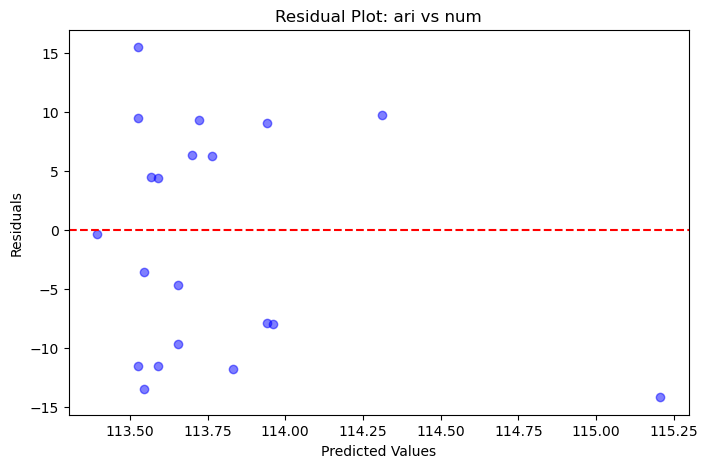

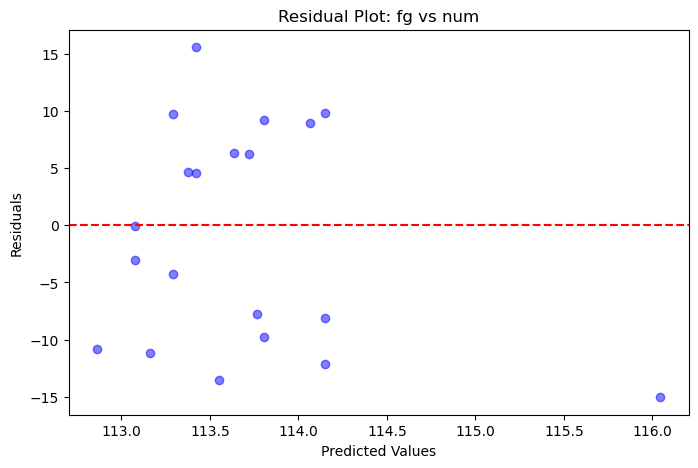

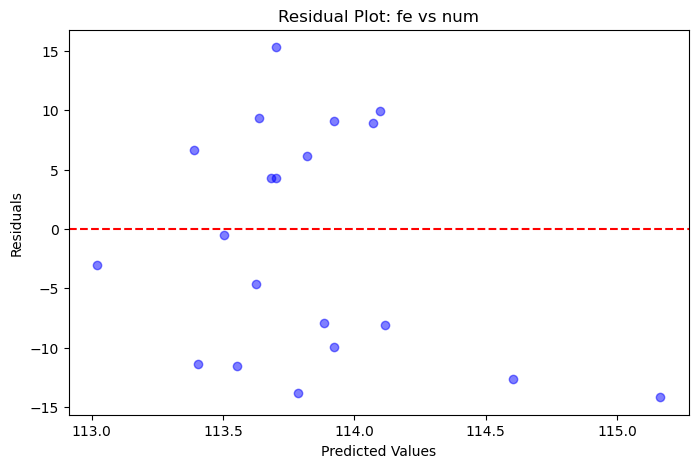

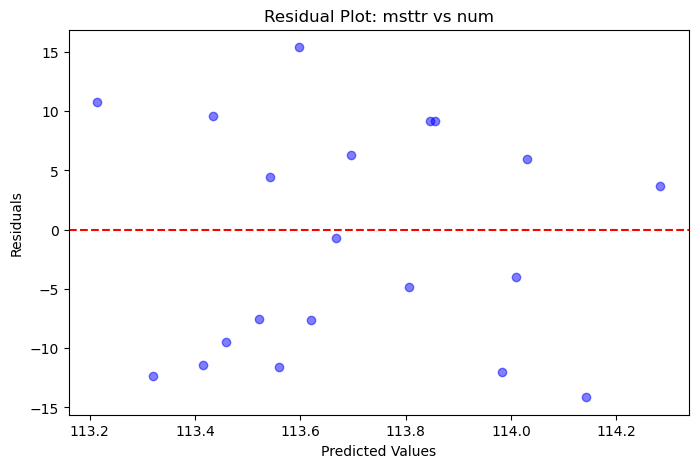

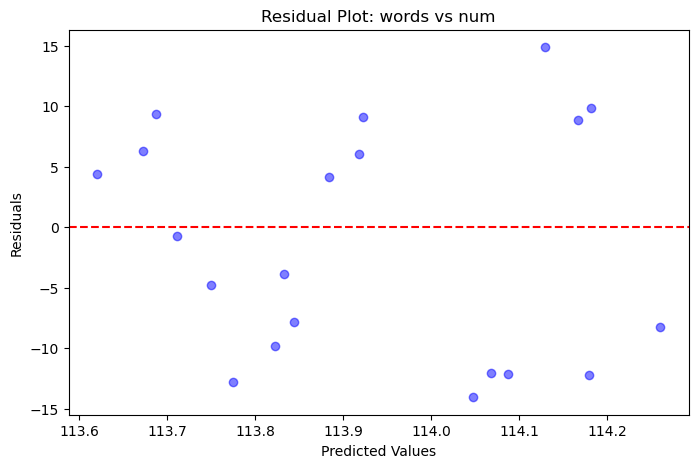

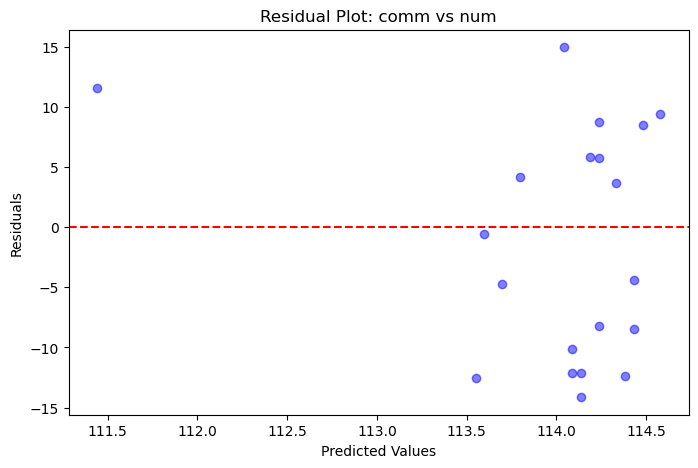

In [22]:
data = pd.read_csv("data_full.csv")  

dependent_variable = "num"
independent_variables = ["ari", "fg", "fe", "msttr", "words", "comm"]

for var in independent_variables:
    X = data[[var]]
    y = data[dependent_variable]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    residuals = y_test - y_pred

    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
    plt.axhline(y=0, color="red", linestyle="dashed")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot: {var} vs {dependent_variable}")
    plt.show()

## residuals for the dependent variable

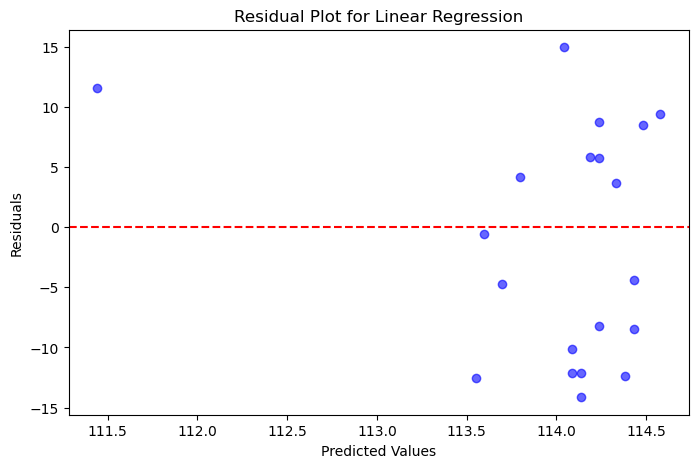

In [26]:
import matplotlib.pyplot as plt

data = pd.read_csv("data_full.csv")

dependent_variable = "num"
independent_variables = ["ari", "fg", "fe", "msttr", "words", "comm"]

X = data[[var]]
y = data[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred


plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="dashed")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()

## Shapiro-Wilk test

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

data = pd.read_csv("data_full.csv")  

dependent_variable = "num"
independent_variables = ["ari", "fg", "fe", "msttr", "words", "comm"]

# For each independent variable, train the model and test residuals for normality
for var in independent_variables:

    X = data[[var]]
    y = data[dependent_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Get predicted values and calculate residuals
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # Perform the Shapiro-Wilk test on residuals
    stat, p_value = stats.shapiro(residuals)
    
    print(f"Shapiro-Wilk Test for residuals of {var}:")
    print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    

    if p_value > 0.05:
        print(f"The residuals for {var} are likely normally distributed (fail to reject H0).")
    else:
        print(f"The residuals for {var} are likely not normally distributed (reject H0).")
    print()  # Blank line for better readability


Shapiro-Wilk Test for residuals of ari:
Statistic: 0.9097, p-value: 0.0630
The residuals for ari are likely normally distributed (fail to reject H0).

Shapiro-Wilk Test for residuals of fg:
Statistic: 0.9197, p-value: 0.0979
The residuals for fg are likely normally distributed (fail to reject H0).

Shapiro-Wilk Test for residuals of fe:
Statistic: 0.9110, p-value: 0.0667
The residuals for fe are likely normally distributed (fail to reject H0).

Shapiro-Wilk Test for residuals of msttr:
Statistic: 0.9144, p-value: 0.0774
The residuals for msttr are likely normally distributed (fail to reject H0).

Shapiro-Wilk Test for residuals of words:
Statistic: 0.9028, p-value: 0.0466
The residuals for words are likely not normally distributed (reject H0).

Shapiro-Wilk Test for residuals of comm:
Statistic: 0.9081, p-value: 0.0585
The residuals for comm are likely normally distributed (fail to reject H0).

